# Example to use the bin_packing class. 

In [1]:
from bin_packing_2 import bin_packing
import pandas as pd
%matplotlib ipympl


# We create a data representing the different bins and furniture the items can be stored in
data = {
    'index': ['F1', 'F2', 'F3'],
    'width': [500, 400, 5000],
    'depth': [1075, 1500, 1500],
    'height': [800, 1110, 900],
    'bins_per_unit': [19, 19, 6],
    'cost_per_unit': [8239.86, 16479.72, 298.98]
}

# Convert the dictionary into a Pandas DataFrame
bins = pd.DataFrame(data)
print(bins)

  index  width  depth  height  bins_per_unit  cost_per_unit
0    F1    500   1075     800             19        8239.86
1    F2    400   1500    1110             19       16479.72
2    F3   5000   1500     900              6         298.98


In [3]:
# We will use a dataframe containing 4 columns ['index', 'width', 'depth', 'height', 'shred_level','shared_bin','bin'] for each item to be stored
# The shared_level and shared_bin indicate if that item must be in the same level or bin with the items in the column
# The bin column indicate if the item must be in a particular type of bin (eg Library). 
data = [
    [0, 128.5, 331, 740, [4, 5], None, None],
    [1, 152.0, 505, 740, None, None, None],
    [2, 139.0, 809, 695, None, None, ['F3','F2']],
    [3, 116.0, 973, 700, None, None, None],
    [4, 103.5, 223, 740, None, None, None],
    [5, 93.0, 691, 720, None, None, ['F2']],
    [6, 234.5, 768, 740, None, None, None],
    [7, 333.0, 733, 650, None, None, None],
    [8, 110.5, 527, 520, None, [1, 6], None],
    [9, 261.0, 664, 640, None, None, None]
]
df = pd.DataFrame(data, columns = ['index', 'width', 'depth', 'height', 'shared_level', 'shared_bin','bin'])
print(df)

   index  width  depth  height shared_level shared_bin       bin
0      0  128.5    331     740       [4, 5]       None      None
1      1  152.0    505     740         None       None      None
2      2  139.0    809     695         None       None  [F3, F2]
3      3  116.0    973     700         None       None      None
4      4  103.5    223     740         None       None      None
5      5   93.0    691     720         None       None      [F2]
6      6  234.5    768     740         None       None      None
7      7  333.0    733     650         None       None      None
8      8  110.5    527     520         None     [1, 6]      None
9      9  261.0    664     640         None       None      None


In [5]:
# Creating an object with the data and the dimensions of the bin
# Additional to the dataframes, we can add a parameter weights = {'space':a,'cost':b} indicating what to enphasize in the optimisation
# In particular we minimize a*total_space + b*total_cost,
# where total_space is the sum of the area of all the bins used, and total_cost the cost of all the bins used.
# Here, the total cost is calculated as ceiling(#bins_type_i_used/#bins_in_unit_type_i)*cost_unit_type_i
problem = bin_packing(df, bins, {'space':1,'cost':1})

In [7]:
# Creating gurobi model
problem.create_model()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-01
Set parameter TimeLimit to value 3600
Set parameter PoolSearchMode to value 2
Set parameter PoolGapAbs to value 1e-05
Model created


In [9]:
# Optimising the problem
# In the log we can check if the solution is optimal, or the gap if not. 
# As well as the number of bins in the solution found.
# In this case the solution found is optimal (gap = 0) and it consists of 2 bins
problem.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 384 rows, 405 columns and 1577 nonzeros
Model fingerprint: 0x51acd1d5
Variable types: 3 continuous, 402 integer (399 binary)
Coefficient statistics:
  Matrix range     [5e-02, 5e+03]
  Objective range  [3e+02, 8e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 307 rows and 329 columns
Presolve time: 0.01s
Presolved: 77 rows, 76 columns, 339 nonzeros
Variable types: 0 continuous, 76 integer (73 binary)
Found heuristic solution: objective 1.676252e+07
Found heuristic solution: objective 1.621678e+07
Found heuristic solution: objective 3437219.5800
Found heuristic solution: objective 2899719.5800

Root relaxation: objective 1.603966e+06, 20 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node 

In [11]:
# To see a particular solution (e.g., solution 1).
# Each row contains the info for each item: e.g., the second row has the info for item 9: goes in bin 2 in the first level which is a F2 type.
problem.return_sol(index_sol = 1)

   index  width  depth  height  bin_1  level_1 bin_type_1
0      7  333.0    733     650      1        1         F1
1      9  261.0    664     640      2        1         F2
2      6  234.5    768     740      3        1         F1
3      1  152.0    505     740      3        2         F1
4      2  139.0    809     695      2        1         F2
5      0  128.5    331     740      2        2         F2
6      3  116.0    973     700      1        2         F1
7      8  110.5    527     520      3        3         F1
8      4  103.5    223     740      2        2         F2
9      5   93.0    691     720      2        2         F2


In [21]:
# To see the space and cost of the solutions
# Note that gurobi found 2 optimal solutions, therefore all the values are the same
print(f'{"Sol":<{10}} {"Space (Total Area)":<{20}} {"Cost":<{20}}')
# Print each value aligned under the column headings
for sol, data in problem.bin_pool_solutions.items():
    space_value = data["space"].getValue()  # Get numerical value
    cost_value = data["cost"].getValue()    # Get numerical value  
    print(f'{sol:<{10}} {space_value:<{20}.1f} {cost_value:<{20}.2f}')
   


Sol        Space (Total Area)   Cost                
1          1675000.0            24719.58            
2          1675000.0            24719.58            


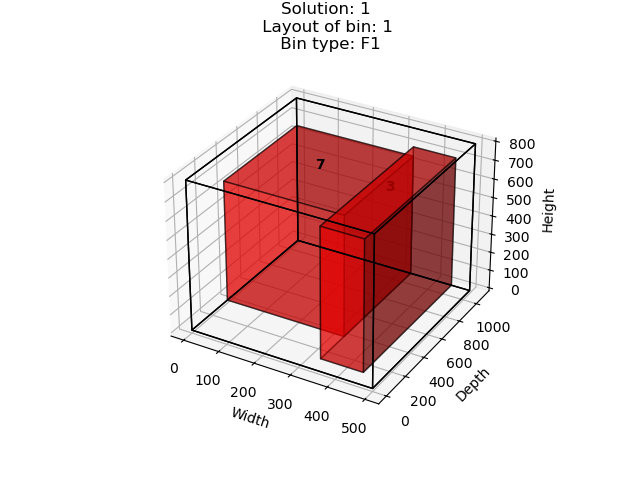

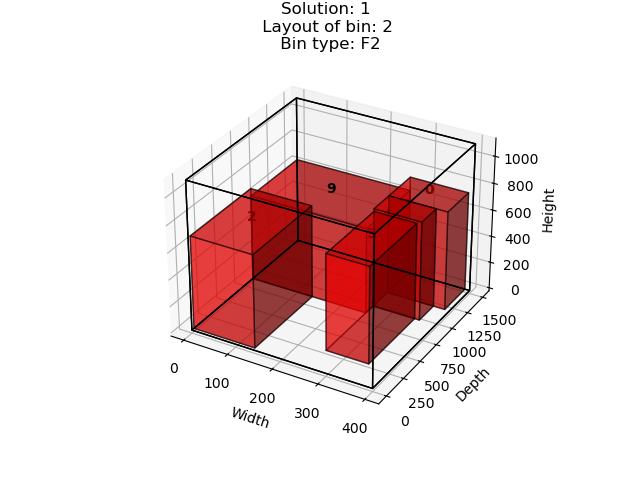

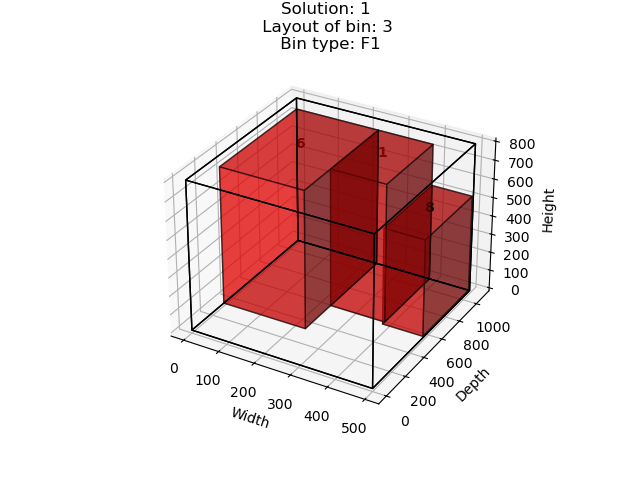

<Axes3D: title={'center': 'Solution: 1 \n Layout of bin: 3 \n Bin type: F1'}, xlabel='Width', ylabel='Depth', zlabel='Height'>

In [15]:
# To see the layout of a bin in a particular solution use the method display_bin(index_sol = solution to explore, index_bin = bin to explore)
problem.display_bin(index_sol = 1, index_bin = 1)
problem.display_bin(index_sol = 1, index_bin = 2)
problem.display_bin(index_sol = 1, index_bin = 3)

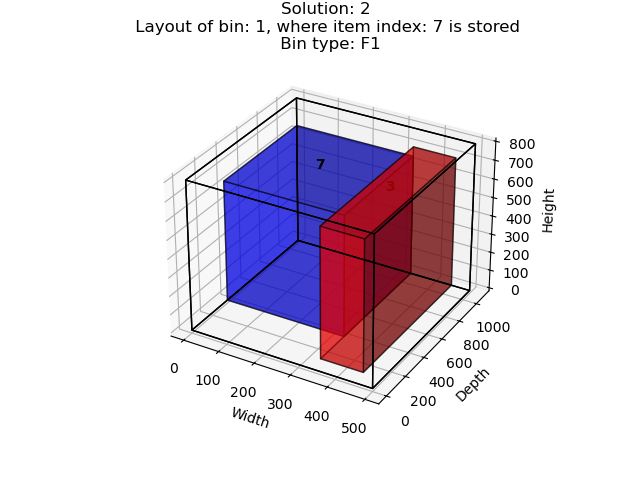

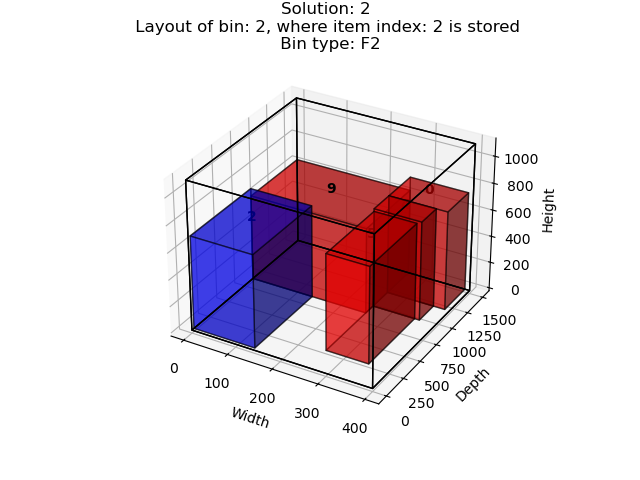

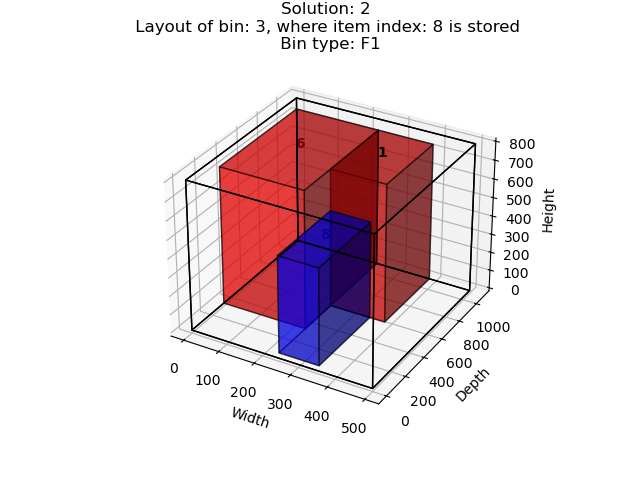

<Axes3D: title={'center': 'Solution: 2 \n Layout of bin: 3, where item index: 8 is stored \n Bin type: F1'}, xlabel='Width', ylabel='Depth', zlabel='Height'>

In [17]:
# To see the layout of an item use the method display_bin(index_solution = solution to explore, index_item = item to explore)
problem.display_bin(index_sol = 2, index_item = 7)
problem.display_bin(index_sol = 2, index_item = 2)
problem.display_bin(index_sol = 2, index_item = 8)

In [19]:
# To change parameter of the optimisation use the method set_parameters(dict)
problem.set_parameters({'Timelimit':3600, 'FeasibilityTol':1e-8, 'IntFeasTol':1e-8})
# In particular if more solutions are needed (default is 10) and/or it is allowed to have solutions that are probably not optimal
# In this case we increase the pool to 15 and allow solutions that are not optimal up to 2 than the best solution found (i.e., if obj_opt is the optimal value of the objective function the solutions that give obj_i with |obj_opt - obj_i| <= 2 are considered).
# However for this problem gurobi only found 2 solutions again.
problem.set_parameters({'PoolSolutions': 15, 'PoolGapAbs':2})
problem.optimize()

Set parameter FeasibilityTol to value 1e-08
Set parameter IntFeasTol to value 1e-08
The model will be reset (all info about previous solutions will be lost).
Discarded solution information
Set parameter PoolSolutions to value 15
Set parameter PoolGapAbs to value 2
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 384 rows, 405 columns and 1577 nonzeros
Model fingerprint: 0x51acd1d5
Variable types: 3 continuous, 402 integer (399 binary)
Coefficient statistics:
  Matrix range     [5e-02, 5e+03]
  Objective range  [3e+02, 8e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 307 rows and 329 columns
Presolve time: 0.01s
Presolved: 77 rows, 76 columns, 339 nonzeros
Variable types: 0 continuous, 76 integer (73 binary)
Found heuristic solution: objective 1.676252e+07
Fo